# Group-11
- Dharmik Patel : 0813537
- Manav Patel : 0804383
- Mayur Parmar : 0811597
- Deep Chaudhari : 0813502
- Nimesh Prajapati : 0816765

# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

# 1. Load libraries

In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, data manupilation

# visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.subplots as sp 
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# 2. Load Data

In [2]:
#loading data
data = pd.read_csv("Customer_Behavior_Data.csv", delimiter = ';')
data.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


# EDA

With every new dataset we need to got throuhg an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to:

Understand what our columns say
Rename columns labels and make them lowercase
Make sure that the data types of columns are correct
Handle missing values
Check for duplicates
Search for outliers
Check for linearity between variables
To achieve this we can take advantage of Pandas and visualisation libraries

In [3]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [4]:

data["avg order value"] = data["avg order value"].apply(lambda x: x.replace(",", "."))
data['discount rate per visited products']= data['discount rate per visited products'].apply(lambda x: x.replace(",", "."))
data['product detail view per app session']= data['product detail view per app session'].apply(lambda x: x.replace(",", "."))
data['add to cart per session']= data['add to cart per session'].apply(lambda x: x.replace(",", "."))

data.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10,3,2.7,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.7,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
data['avg order value'] = data['avg order value'].astype(float)
data['discount rate per visited products']= data['discount rate per visited products'].astype(float)
data['product detail view per app session']= data['product detail view per app session'].astype(float)
data['add to cart per session']= data['add to cart per session'].astype(float)
data['location code'] = data['location code'].astype('category')

# Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [6]:
data.describe()

,account length,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
count,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# 3. Handle Missing Values

In [7]:
data.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [8]:
data = data.replace(" ", np.nan)

In [9]:
data.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [10]:
data.shape

(3333, 20)

# 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [10]:
df = data.duplicated().any()
df

False

# 5. Search for outliers

Outliers are data points at the extreme points of a dataset.
Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
Because of this, we need to be careful when we cleanse our data
If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
If the outliers are errors we should generally remove those data points
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:

Visualisations such as histograms and blox plots
Use interquartiles with rules such as:
outlier < Q1 - 1.5(IQR)
outlier > Q3 + 1.5(IQR)

In [15]:
col = ['session duration', 'avg order value', 'promotion clicks','sale product views',
            'app transactions', 'account length','add to wishlist','desktop sessions','customer service calls']

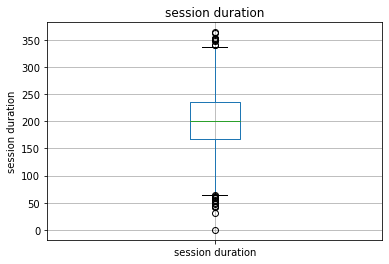

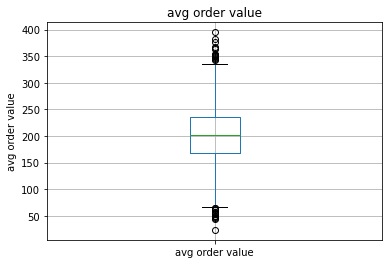

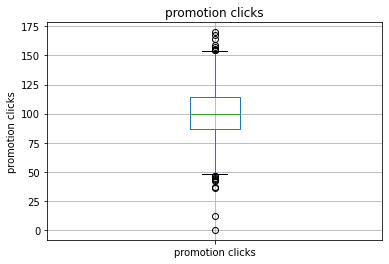

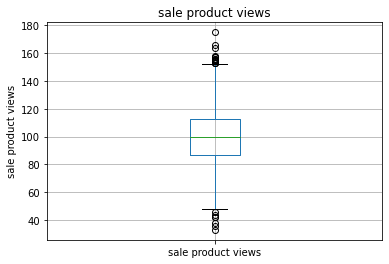

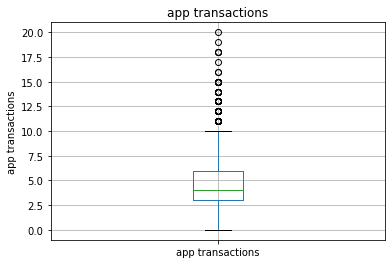

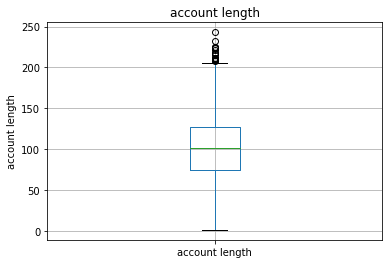

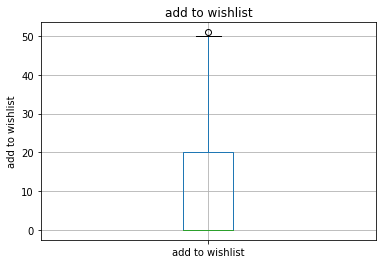

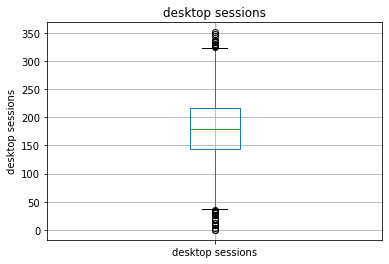

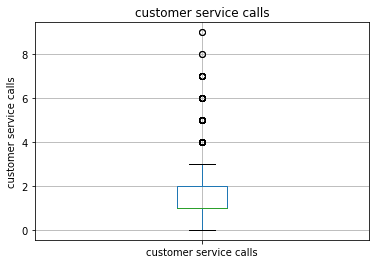

In [16]:
for col in col:
    data.boxplot(column=col)
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [23]:
for col in col:
    data.hist(column=col)
    plt.ylabel(col)
    plt.title(col)
    plt.show()

KeyError: "None of [Index(['c'], dtype='object')] are in the [columns]"

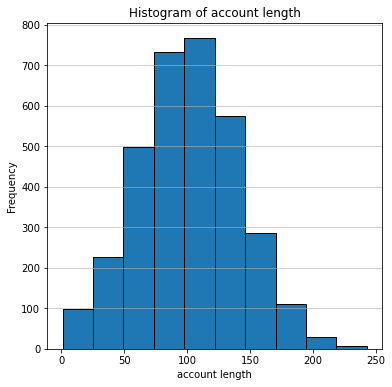

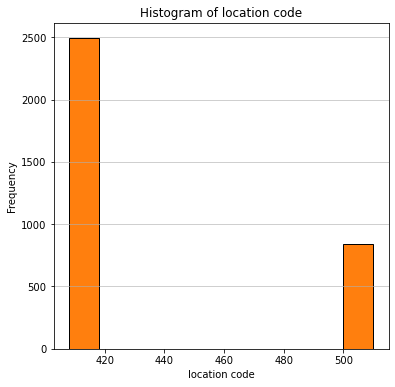

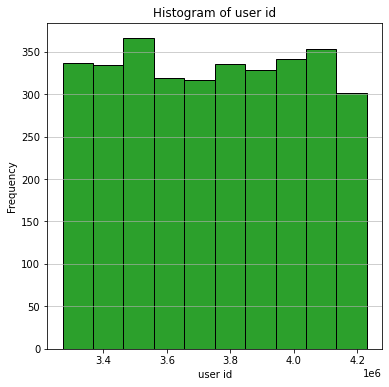

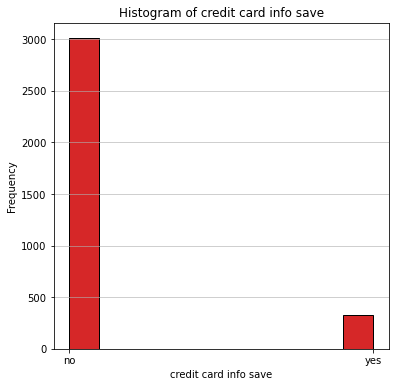

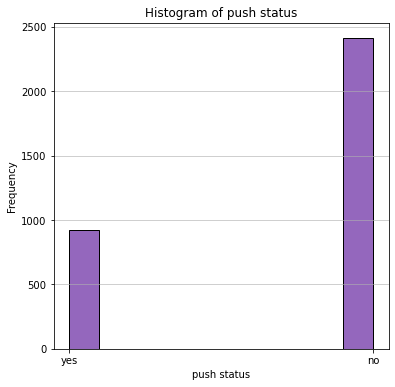

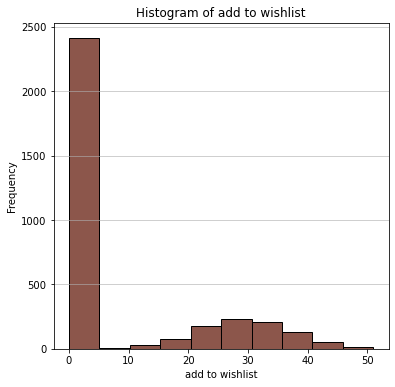

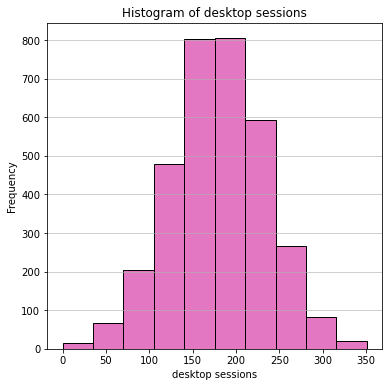

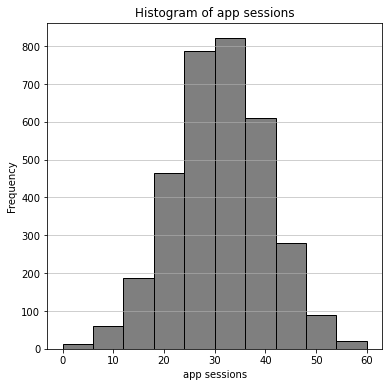

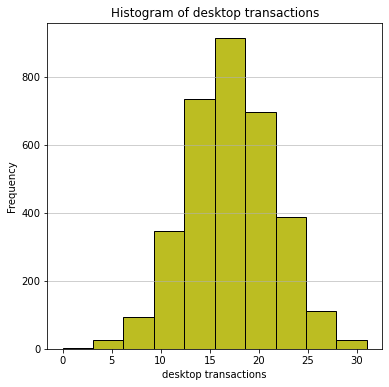

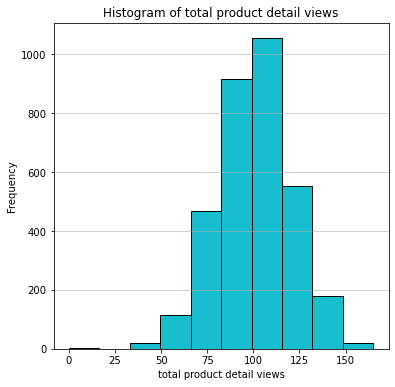

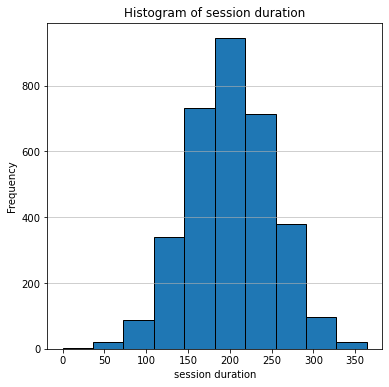

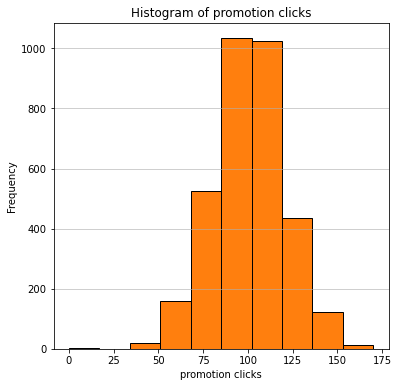

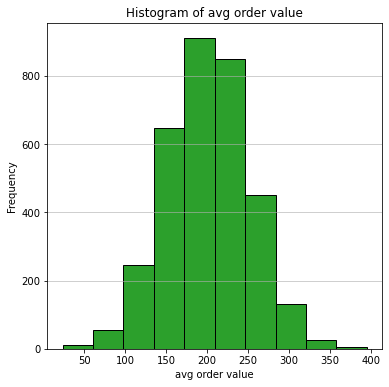

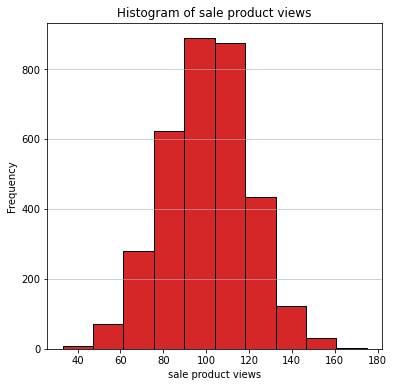

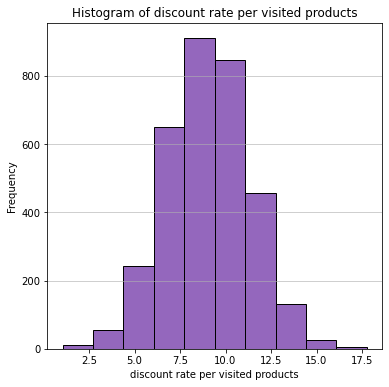

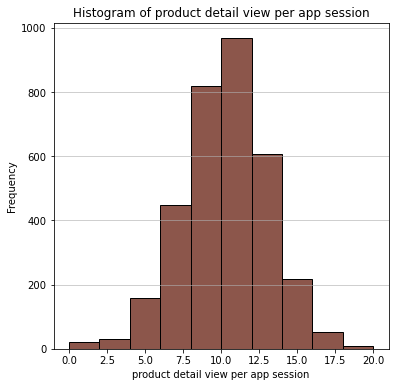

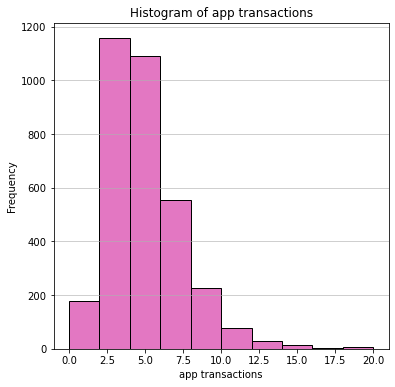

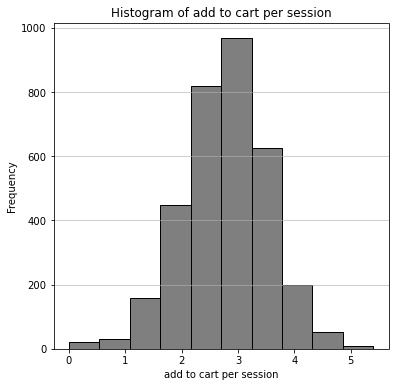

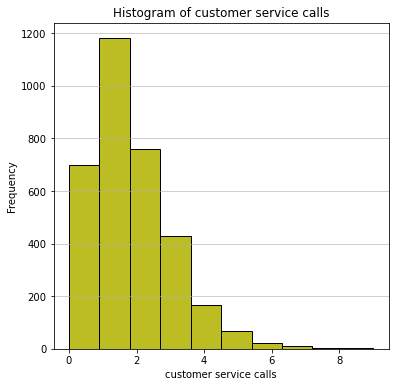

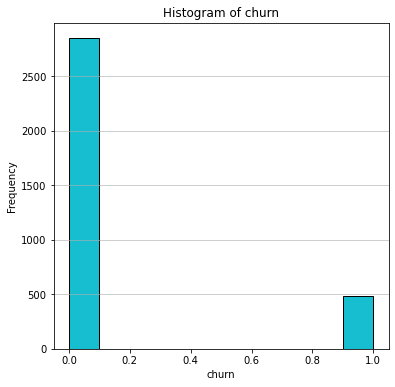

In [21]:
#Visualizing Histograms for Customer Data Columns

# defining color palette with distinct colors
colors = sns.color_palette(n_colors=len(data.columns))

for i, column in enumerate(data.columns):
    plt.figure(figsize=(6, 6))  # Set the figure size
    plt.hist(data[column], bins=10, color=colors[i], edgecolor='black')  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [14]:
cols_to_analyze =['session duration', 'avg order value', 'promotion clicks','sale product views',
            'app transactions', 'account length','add to wishlist','desktop sessions','customer service calls']
# Outliers with interquartiles
def identify_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Identify outliers for each feature
for col in cols_to_analyze:
    outliers = identify_outliers(data, col)
    print(f'Column: {col}')
    print(outliers)
    print('\n')

Column: session duration
      account length location code  user id credit card info save push status  \
3                 84           408  3759999                   yes          no   
6                121           510  3559993                    no         yes   
8                117           408  3354719                    no          no   
32               172           408  3831121                    no          no   
186              106           408  4221471                    no          no   
302              121           408  3297347                    no          no   
533              125           415  4065059                    no         yes   
580              113           415  3536007                    no          no   
587              114           415  4064588                    no          no   
821               80           415  3322137                    no          no   
850              166           408  3549492                    no          no   
889

# 6. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers


In [15]:
print(data.columns)

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')


# 7. Conclusions based on visualisations

All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers "True outliers".
If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

In [16]:
def remove_outliers_std(data, col_to_analyze):
    mean = data[col_to_analyze].mean()
    std = data[col_to_analyze].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    data = data[(data[col_to_analyze] >= lower_bound) & (data[col_to_analyze] <= upper_bound)]
    return data

# Define the list of columns you want to analyze for outliers
cols_to_analyze = ['session duration', 'avg order value', 'promotion clicks','sale product views',
            'app transactions', 'account length','add to wishlist','desktop sessions','customer service calls']

# Remove outliers for each feature using standard deviation
for col_to_analyze in cols_to_analyze:
    data = remove_outliers_std(data, col_to_analyze)

# Print the updated dataset without outliers
print(data)

      account length location code  user id credit card info save push status  \
0                128           415  3824657                    no         yes   
1                107           415  3717191                    no         yes   
2                137           415  3581921                    no          no   
3                 84           408  3759999                   yes          no   
4                 75           415  3306626                   yes          no   
...              ...           ...      ...                   ...         ...   
3328             192           415  4144276                    no         yes   
3329              68           415  3703271                    no          no   
3330              28           510  3288230                    no          no   
3331             184           510  3646381                   yes          no   
3332              74           415  4004344                    no         yes   

      add to wishlist  desk

In [17]:
cols_to_analyze =['session duration', 'avg order value', 'promotion clicks','sale product views',
            'app transactions', 'account length','add to wishlist','desktop sessions','customer service calls']
# Outliers with interquartiles
def identify_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Identify outliers for each feature
for col in cols_to_analyze:
    outliers = identify_outliers(data, col)
    print(f'Column: {col}')
    print(outliers)
    print('\n')

Column: session duration
      account length location code  user id credit card info save push status  \
3                 84           408  3759999                   yes          no   
6                121           510  3559993                    no         yes   
8                117           408  3354719                    no          no   
186              106           408  4221471                    no          no   
302              121           408  3297347                    no          no   
580              113           415  3536007                    no          no   
587              114           415  4064588                    no          no   
850              166           408  3549492                    no          no   
893              167           415  3978772                   yes          no   
1054              50           408  3628331                    no          no   
1190             149           415  3695942                    no          no   
133

In [18]:
print(data.columns)

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')


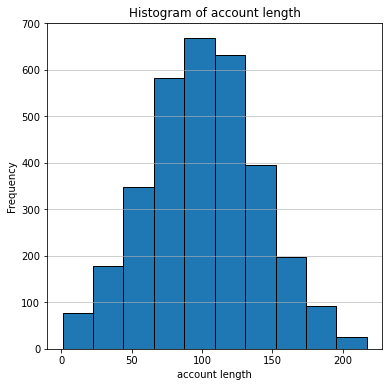

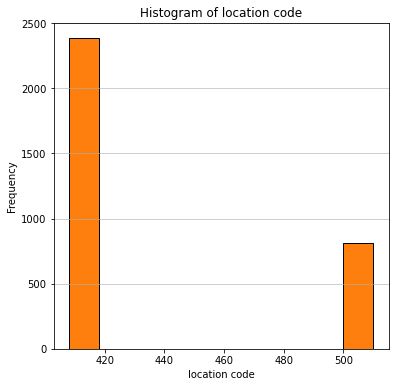

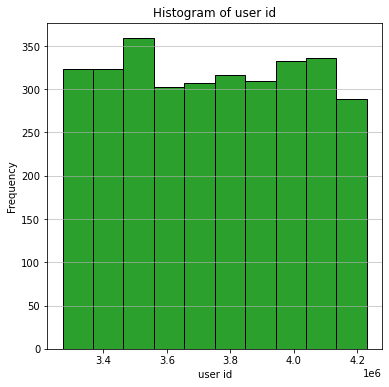

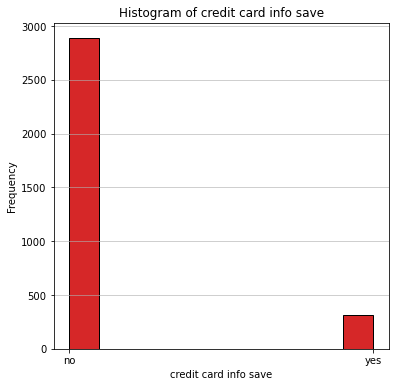

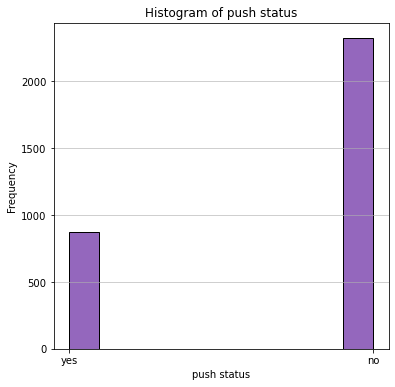

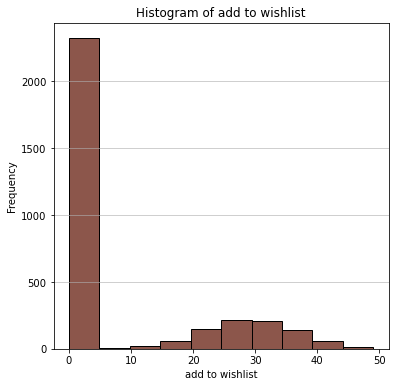

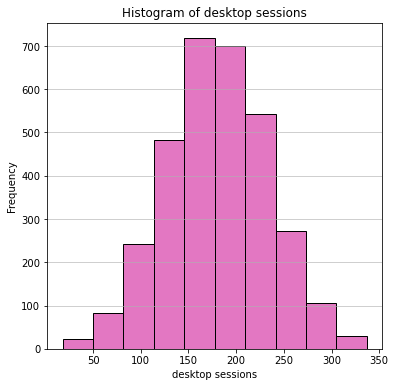

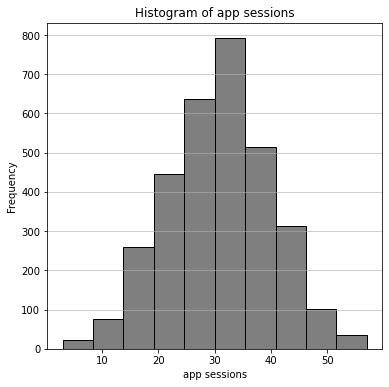

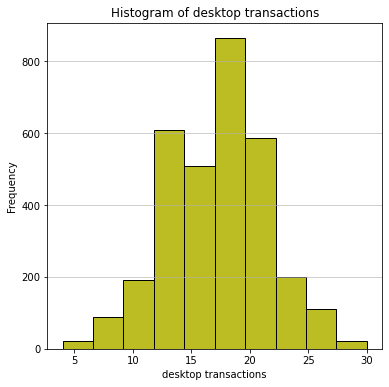

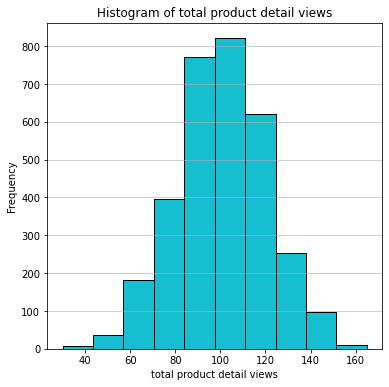

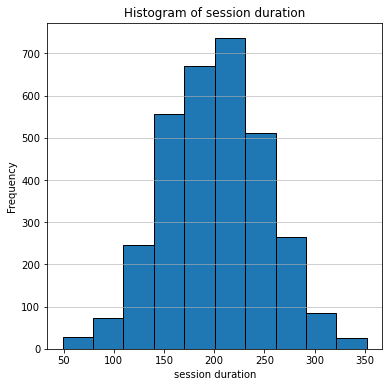

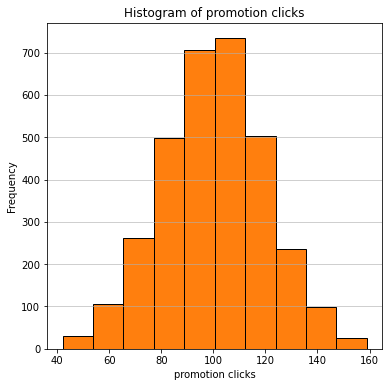

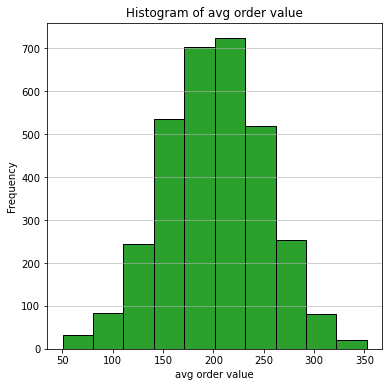

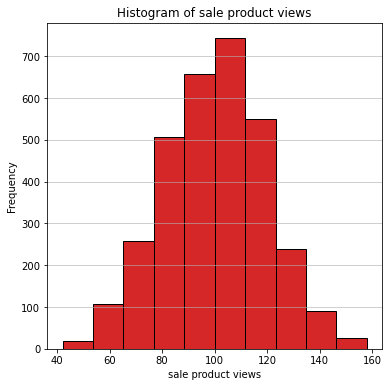

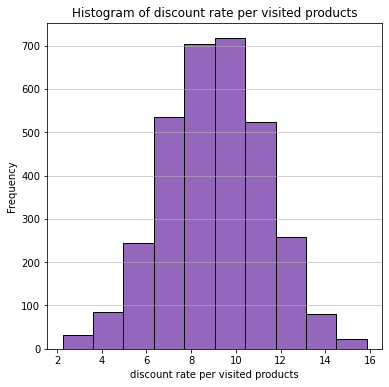

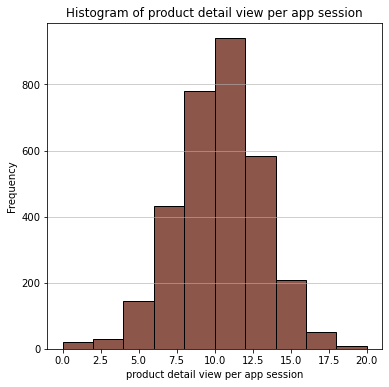

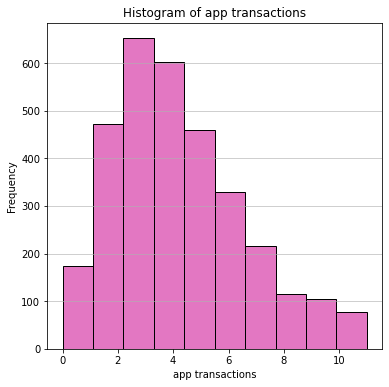

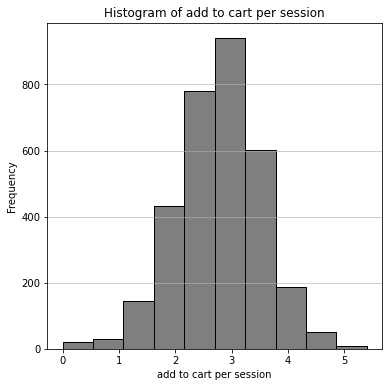

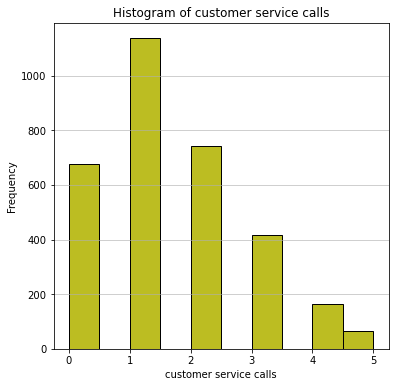

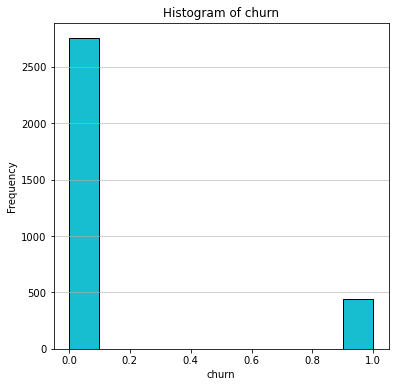

In [19]:
#Visualizing Histograms for Customer Data Columns

# defining color palette with distinct colors
colors = sns.color_palette(n_colors=len(data.columns))

for i, column in enumerate(data.columns):
    plt.figure(figsize=(6, 6))  # Set the figure size
    plt.hist(data[column], bins=10, color=colors[i], edgecolor='black')  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()